# <center>Data Mining Project 1 Spring semester 2019-2020</center>
## <center>Παναγιώτης Ευαγγελίου &emsp; 1115201500039</center>
## <center>Γεώργιος Μαραγκοζάκης &emsp; 1115201500089</center>

___

### Do all the necessary imports for this notebook

In [1]:
# for data exploration
import pandas as pd
import os
from IPython.display import display
from IPython.display import Image
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# for preprocessing
from string import punctuation
import re

# for recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# for collocations
from nltk.collocations import *
from nltk import word_tokenize
from nltk.metrics import BigramAssocMeasures

## __Data Exploration__

- ### *Make one csv with the specific columns*

In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

myMonthsFolder = ['febrouary','march','april']
dataPathDir = './data/'

allMonthDf = []

# for each month
for month in myMonthsFolder:
    print('Folder ' + month + ':')
    specificPath = dataPathDir + month + '/'

    # list of dataframes of this month
    monthFilesDfList = []

    # find the column's names of each csv
    for fileName in os.listdir(specificPath):
        # we need to check only .csv files
        if fileName.endswith(".csv"):
            thisCsv = pd.read_csv(os.path.join(specificPath, fileName), dtype='unicode')
            
            # make a list of columns of this file 
            columnsList = [x for x in thisCsv.columns]

            # make columns df for this file
            d = {fileName:columnsList}
            df = pd.DataFrame(data=d)
            
            # append this df to monthFilesDfList
            monthFilesDfList.append(df)
        else:
            continue

    concatDf = pd.concat(monthFilesDfList, axis=1)
    concatDf = concatDf.fillna('-')
    
    display(concatDf)
    allMonthDf.append(concatDf)

# check if corresponding files in months' folders have the same column names
allAreEqual = True
curentDf = allMonthDf[0]
for x in allMonthDf[1:]:
    if not curentDf.equals(x):
        allAreEqual = False
        break

if allAreEqual:
    print('Column names in corresponding files in months\' folders are the same.')
else:
    print('Column names in corresponding files in months\' folders are not the same.')

Folder febrouary:


,listings0.csv,neighbourhoods.csv,reviews0.csv,listings.csv,reviews.csv,calendar.csv
0,id,neighbourhood_group,listing_id,id,listing_id,listing_id
1,name,neighbourhood,date,listing_url,id,date
2,host_id,-,-,scrape_id,date,available
3,host_name,-,-,last_scraped,reviewer_id,price
4,neighbourhood_group,-,-,name,reviewer_name,adjusted_price
5,neighbourhood,-,-,summary,comments,minimum_nights
6,latitude,-,-,space,-,maximum_nights
7,longitude,-,-,description,-,-
8,room_type,-,-,experiences_offered,-,-
9,price,-,-,neighborhood_overview,-,-


Folder march:


,listings0.csv,neighbourhoods.csv,reviews0.csv,listings.csv,reviews.csv,calendar.csv
0,id,neighbourhood_group,listing_id,id,listing_id,listing_id
1,name,neighbourhood,date,listing_url,id,date
2,host_id,-,-,scrape_id,date,available
3,host_name,-,-,last_scraped,reviewer_id,price
4,neighbourhood_group,-,-,name,reviewer_name,adjusted_price
5,neighbourhood,-,-,summary,comments,minimum_nights
6,latitude,-,-,space,-,maximum_nights
7,longitude,-,-,description,-,-
8,room_type,-,-,experiences_offered,-,-
9,price,-,-,neighborhood_overview,-,-


Folder april:


,listings0.csv,neighbourhoods.csv,reviews0.csv,listings.csv,reviews.csv,calendar.csv
0,id,neighbourhood_group,listing_id,id,listing_id,listing_id
1,name,neighbourhood,date,listing_url,id,date
2,host_id,-,-,scrape_id,date,available
3,host_name,-,-,last_scraped,reviewer_id,price
4,neighbourhood_group,-,-,name,reviewer_name,adjusted_price
5,neighbourhood,-,-,summary,comments,minimum_nights
6,latitude,-,-,space,-,maximum_nights
7,longitude,-,-,description,-,-
8,room_type,-,-,experiences_offered,-,-
9,price,-,-,neighborhood_overview,-,-


Column names in corresponding files in months' folders are the same.


Παρατηρούμε ότι:
- Τα αντίστοιχα αρχεία σε όλους τους φακέλους των μηνών έχουν τα ίδια ονόματα στηλών.
- Τα περισσότερα .csv αρχεία έχουν σχετικά λίγες στήλες εκτός από το αρχείο listings.csv το οποίο
έχει πολλές στήλες οπότε είναι δύσκολο να βρούμε "με το μάτι" τις στήλες που ζητούνται.

__Let's find which file has each of the specific columns that we need. As column
names in corresponding files in months' folders are the same we just need to check only one folder.__

In [3]:
# define the columns that we want to have in train csv
wantedColumns = ['id', 'zipcode', 'transit', 'Bedrooms', 'Beds', 'Review_scores_rating', 'Number_of_reviews', \
                  'Neighbourhood', 'Name', 'Latitude', 'Longitude', 'Last_review', 'Instant_bookable', \
                  'Host_since', 'Host_response_rate', 'Host_identity_verified', 'Host_has_profile_pic', 'First_review', \
                  'Description', 'City', 'cancellation_policy', 'Bed_type', 'Bathrooms', 'Accommodates', 'Amenities', \
                  'Room_type', 'Property_type', 'price', 'Availability_365', 'Minimum_nights']

specificMonthFilesDf = allMonthDf[0]
dfColumns = list(specificMonthFilesDf)

allColumnsFileMapDfList = []

for col in wantedColumns:
    # list of files that include the specific column
    fileLists = []
    
    for fileName in dfColumns:
        # so as not to have problem with case sensitivity
        tempDf = specificMonthFilesDf[fileName].str.upper()

        if col.upper() in tempDf.values:
            fileLists.append(fileName)

    # make df for this col
    d = {col:fileLists}
    df = pd.DataFrame(data=d)

    allColumnsFileMapDfList.append(df)

concatMapDf = pd.concat(allColumnsFileMapDfList, axis=1)
concatMapDf = concatMapDf.fillna('-')

display(concatMapDf)

,id,zipcode,transit,Bedrooms,Beds,Review_scores_rating,Number_of_reviews,Neighbourhood,Name,Latitude,Longitude,Last_review,Instant_bookable,Host_since,Host_response_rate,Host_identity_verified,Host_has_profile_pic,First_review,Description,City,cancellation_policy,Bed_type,Bathrooms,Accommodates,Amenities,Room_type,Property_type,price,Availability_365,Minimum_nights
0,listings0.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings0.csv,listings0.csv,listings0.csv,listings0.csv,listings0.csv,listings0.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings.csv,listings0.csv,listings.csv,listings0.csv,listings0.csv,listings0.csv
1,listings.csv,-,-,-,-,-,listings.csv,neighbourhoods.csv,listings.csv,listings.csv,listings.csv,listings.csv,-,-,-,-,-,-,-,-,-,-,-,-,-,listings.csv,-,listings.csv,listings.csv,listings.csv
2,reviews.csv,-,-,-,-,-,-,listings.csv,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,calendar.csv,-,calendar.csv


Παρατηρούμε ότι οι περισσότερες από τις ζητούμενες στήλες βρίσκονται στα αρχεία listings.csv και listings0.csv.
Οπότε ας δούμε τα περιεχόμενα αυτών των αρχείων.

In [4]:
testDf = pd.read_csv('./data/febrouary/listings0.csv', dtype='unicode')

testDf

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98887924384334,23.764314563525055,Entire home/apt,71,1,17,2019-01-12,0.18,8,294
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988434261427905,23.763446602200577,Entire home/apt,82,1,31,2017-11-23,0.40,8,0
2,10990,"50m2, Metro, WI-FI, cableTV, more",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98783415721626,23.76478728692748,Entire home/apt,47,1,27,2019-02-01,0.35,8,282
3,10993,"Studio, metro, cable tv, wi-fi, etc",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98860728307634,23.76422238412952,Entire home/apt,37,1,42,2019-02-02,0.54,8,286
4,10995,"47m2, close to metro,cable TV,wi-fi",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989497855276916,23.76356202742272,Entire home/apt,47,2,16,2019-01-11,0.15,8,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,32226813,Zoe's Studio with Balcony Nefeli,133000,Ζωή,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.96242084336051,23.727915993671754,Entire home/apt,40,2,0,NaN,NaN,5,353
9096,32227307,"Cozy and modern studio, next to metro station",137470886,Apostolos,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.989298245925326,23.722503845886248,Entire home/apt,26,1,0,NaN,NaN,1,230
9097,32228418,Venia luxury suite,135482892,Home,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97609968583329,23.727445757044954,Entire home/apt,126,1,0,NaN,NaN,63,357
9098,32228956,Ανακαινισμένο διαμέρισμα αυτόνομο !!!!,184043399,Panos,NaN,ΚΥΨΕΛΗ,38.001278373715195,23.737725075859018,Entire home/apt,45,1,0,NaN,NaN,1,160


In [5]:
testDf = pd.read_csv('./data/febrouary/listings.csv', dtype='unicode')

testDf

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20190208211339,2019-02-08,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Athens Furnished Apartment No6 is an excellent...,Athens Furnished Apartment No6 is 3-bedroom ap...,none,Ampelokipi district is nice multinational and ...,Although is very easy to come from the airport...,Note: 5-day ticket for all the public transpor...,Guest have access to all amenities in the apar...,-Our reception is 10 meters away from the entr...,"- Parties, meetings, appointments or invite pe...",NaN,NaN,https://a0.muscache.com/im/pictures/2821636/fb...,NaN,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/859c1eda-f...,https://a0.muscache.com/im/pictures/859c1eda-f...,Ambelokipi,8,8,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",Ambelokipi,ΑΜΠΕΛΟΚΗΠΟΙ,NaN,Athens,Attica,11526,Athens,"Athens, Greece",GR,Greece,37.98887924384334,23.764314563525055,t,Apartment,Entire home/apt,8,2.0,3,5,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1076,$71.00,$700.00,"$2,800.00",$0.00,$0.00,4,$9.00,1,45,1,2,45,45,1.4,45.0,today,t,22,49,73,294,2019-02-08,17,2,2011-05-20,2019-01-12,96,10,10,10,10,9,10,t,478825,NaN,t,f,strict_14_with_grace_period,f,f,8,8,0,0,0.18
1,10988,https://www.airbnb.com/rooms/10988,20190208211339,2019-02-08,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Athens Furnished Apartment No4 is an excellent...,Athens Furnished Apartment No4 is 2-bedroom ap...,none,Ampelokipi district is nice multinational and ...,NaN,Note: 5-day ticket for all the public transpor...,Guest have access to all amenities in the apar...,-Our reception is 10 meters away from the entr...,"- Parties, meetings, appointments or invite pe...",NaN,NaN,https://a0.muscache.com/im/pictures/91367/7e0a...,NaN,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/859c1eda-f...,https://a0.muscache.com/im/pictures/859

Από οσο βλέπουμε τα δεδομένα για τις ζητούμενες στήλες είναι ίδια τόσο στο listings0.csv όσο και στο
στο listings.csv. Οπότε αρκεί να πάρουμε τα δεδομένα από το listings.csv.

In [6]:
# read listings.csv from the 3 folders
febDf = pd.read_csv('./data/febrouary/listings.csv', dtype='unicode')
marDf = pd.read_csv('./data/march/listings.csv', dtype='unicode')
aprDf = pd.read_csv('./data/april/listings.csv', dtype='unicode')

# add extra column for each month
febDf['month'] = ['February' for i in range(febDf.shape[0])]
marDf['month'] = ['March' for i in range(marDf.shape[0])]
aprDf['month'] = ['April' for i in range(aprDf.shape[0])]

# replace last_review date with its review_text
reviewsCsvs = ['./data/febrouary/reviews.csv', './data/march/reviews.csv', './data/april/reviews.csv']
monthsDfs = [febDf, marDf, aprDf]

for i in range(0,len(monthsDfs)):
    currentReviewDf = pd.read_csv(reviewsCsvs[i], dtype='unicode')

    # we need only the 2 key-columns (listing_id, date) and the "new" column (comments)
    currentReviewDf = currentReviewDf[['listing_id','date','comments']]

    #rename key-columns so as to be same in both dataframes
    currentReviewDf = currentReviewDf.rename(columns={"date": "review_date", "comments": "review_text"})
    monthsDfs[i] = monthsDfs[i].rename(columns={"id": "listing_id", "last_review": "review_date"})

    #merge dataframes on listing_id and review_date (which is the last_review date in main "train" csv)
    monthsDfs[i] = pd.merge(monthsDfs[i], currentReviewDf, how='left', on=['listing_id', 'review_date'])

    #revert to previous names in main "train" csv
    monthsDfs[i] = monthsDfs[i].rename(columns={"listing_id": "id", "review_text": "last_review"})

    #we may have some duplicates, because there may be more than one review for the last_review date
    #so we will keep only the first one
    monthsDfs[i] = monthsDfs[i][monthsDfs[i].duplicated(subset='id', keep='first') == False]

trainCsv = pd.concat(monthsDfs, ignore_index=True)

# let's keep only useful columns
# make all uppercase so as not to have problem with case sensitivity
trainCsv.columns = [x.upper() for x in trainCsv.columns]

# These are the columns we want. We have also added month column 
usefulColumns = ['id', 'zipcode', 'transit', 'Bedrooms', 'Beds', 'Review_scores_rating', 'Number_of_reviews', \
                  'Neighbourhood', 'Name', 'Latitude', 'Longitude', 'Last_review', 'Instant_bookable', \
                  'Host_since', 'Host_response_rate', 'Host_identity_verified', 'Host_has_profile_pic', 'First_review', \
                  'Description', 'City', 'cancellation_policy', 'Bed_type', 'Bathrooms', 'Accommodates', 'Amenities', \
                  'Room_type', 'Property_type', 'price', 'Availability_365', 'Minimum_nights', 'Month']

usefulColumns = [x.upper() for x in usefulColumns]

trainCsv = trainCsv[usefulColumns]

# save to csv file
trainCsv.to_csv('train.csv',index=False)

trainCsv

,ID,ZIPCODE,TRANSIT,BEDROOMS,BEDS,REVIEW_SCORES_RATING,NUMBER_OF_REVIEWS,NEIGHBOURHOOD,NAME,LATITUDE,LONGITUDE,LAST_REVIEW,INSTANT_BOOKABLE,HOST_SINCE,HOST_RESPONSE_RATE,HOST_IDENTITY_VERIFIED,HOST_HAS_PROFILE_PIC,FIRST_REVIEW,DESCRIPTION,CITY,CANCELLATION_POLICY,BED_TYPE,BATHROOMS,ACCOMMODATES,AMENITIES,ROOM_TYPE,PROPERTY_TYPE,PRICE,AVAILABILITY_365,MINIMUM_NIGHTS,MONTH
0,10595,11526,Note: 5-day ticket for all the public transpor...,3,5,96,17,Ambelokipi,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37.98887924384334,23.764314563525055,Το διαμέρισμα ήταν καλύτερο από όσο περίμενα! ...,t,2009-09-08,100%,t,t,2011-05-20,Athens Furnished Apartment No6 is 3-bedroom ap...,Athens,strict_14_with_grace_period,Real Bed,2.0,8,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$71.00,294,1,February
1,10988,11526,Note: 5-day ticket for all the public transpor...,2,2,92,31,Ambelokipi,"75m2, 2-br, metro, wi-fi, cable TV",37.988434261427905,23.763446602200577,"Sehr gute Unterkunft, sauber und bequem , ist ...",t,2009-09-08,100%,t,t,2012-10-21,Athens Furnished Apartment No4 is 2-bedroom ap...,Athens,strict_14_with_grace_period,Real Bed,1.0,5,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$82.00,0,1,February
2,10990,11526,Note: 5-day ticket for all the public transpor...,1,1,97,27,Ambelokipi,"50m2, Metro, WI-FI, cableTV, more",37.98783415721626,23.76478728692748,ήταν όλα τελεια,t,2009-09-08,100%,t,t,2012-09-06,Athens Furnished Apartment No3 is 1-bedroom ap...,Athens,strict_14_with_grace_period,Real Bed,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$47.00,282,1,February
3,10993,115 26,Note: 5-day ticket for all the public transpor...,0,1,97,42,Ambelokipi,"Studio, metro, cable tv, wi-fi, etc",37.98860728307634,23.76422238412952,I was in town for 1 week for business. Manos p...,t,2009-09-08,100%,t,t,2012-09-24,The Studio is an -excellent located -close t...,Athens,strict_14_with_grace_period,Real Bed,1.0,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$37.00,286,1,February
4,10995,11526,Note: 5-day ticket for all the public transpor...,1,1,95,16,Ambelokipi,"47m2, close to metro,cable TV,wi-fi",37.989497855276916,23.76356202742272,Φιλόξενος ο οικοδεσπότης και πρόθυμος να μας β...,t,2009-09-08,100%,t,t,2010-07-08,AQA No2 is 1-bedroom apartment (47m2) -excell...,Athens,strict_14_with_grace_period,Real Bed,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$47.00,308,2,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28117,33819692,105 56,NaN,1,1,NaN,0,NaN,Lysicrates Monument - Athens 33,37.97412,23.72854,NaN,t,2014-05-09,100%,t,t,NaN,"""Athens 33"" is a newly renovated building in N...",Athina,flexible,Real Bed,1.0,2,"{TV,Wifi,""Air conditioning"",Kitchen,Breakfast,...",Entire home/apt,Apartment,$90.00,260,2,April
28118,33820145,106 81,Omonia metro station is 600 m away from the ap...,2,2,NaN,0,NaN,Bright and Stylish Exarchia apartment,37.98527,23.73508,NaN,t,2019-04-12,NaN,f,t,NaN,"Newly renovated, this two bedroom apartment is...",Athina,moderate,Real Bed,2.0,6,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",Entire home/apt,Apartment,$50.00,263,2,April
28119,33821757,105 54,NaN,2,2,NaN,0,NaN,Athens21,37.97698,23.72531,NaN,t,2019-04-12,NaN,f,t,NaN,Athens 21 is centrally located right next to M...,Athina,flexible,Real Bed,1.0,4,"{TV,Wifi,""Air conditioning"",Breakfast,Elevator...",Private room,Boutique hotel,$200.00,86,1,April
28120,33821833,105 56,NaN,1,1,NaN,0,NaN,Tower of Winds,37.97402,23.72721,NaN,t,2014-05-09,100%,t,t,NaN,"""Athens 33"" is a newly renovated building in N...",Athens,flexible,Real Bed,1.0,2,"{TV,Wifi,""Air conditioning"",Kitchen,Breakfast,...",Entire home/apt,Apartment,$90.00,260,2,April


- ### *Handling Missing Data*

Let's see if we have missing data

In [7]:
# Let's check which columns contain nan values
trainCsv.isna().any()

ID                        False
ZIPCODE                    True
TRANSIT                    True
BEDROOMS                   True
BEDS                       True
REVIEW_SCORES_RATING       True
NUMBER_OF_REVIEWS         False
NEIGHBOURHOOD              True
NAME                       True
LATITUDE                  False
LONGITUDE                 False
LAST_REVIEW                True
INSTANT_BOOKABLE          False
HOST_SINCE                 True
HOST_RESPONSE_RATE         True
HOST_IDENTITY_VERIFIED     True
HOST_HAS_PROFILE_PIC       True
FIRST_REVIEW               True
DESCRIPTION                True
CITY                       True
CANCELLATION_POLICY       False
BED_TYPE                  False
BATHROOMS                 False
ACCOMMODATES              False
AMENITIES                 False
ROOM_TYPE                 False
PROPERTY_TYPE             False
PRICE                     False
AVAILABILITY_365          False
MINIMUM_NIGHTS            False
MONTH                     False
dtype: b

  - #### Handling missing data on zipcode column

In [8]:
# find unique values of neighboorhood variable
neighborhoodNames = list(trainCsv.NEIGHBOURHOOD.unique())

# remove nan values
neighborhoodNames = [x for x in neighborhoodNames if not pd.isna(x)]

# group by neighborhood
groupedByNeighborhood = trainCsv.groupby(['NEIGHBOURHOOD'])

# for each neighborhood find the most common zipcode
zipCodeNeighborhoodDict = dict()

for neighborhood in neighborhoodNames:
    zipCodeCountSeries = groupedByNeighborhood.get_group(neighborhood).groupby('ZIPCODE')['ID'].nunique()
    mostCommonZipCode = zipCodeCountSeries[zipCodeCountSeries == zipCodeCountSeries.max()]
    zipCodeNeighborhoodDict[neighborhood] = mostCommonZipCode.index[0]

# fill nan values with the most common zipcode of the corresponding neighborhood
trainCsv['ZIPCODE'] = trainCsv['ZIPCODE'].fillna(trainCsv.NEIGHBOURHOOD.map(zipCodeNeighborhoodDict))

  - #### Handling missing data on transit column

In [9]:
# fill nan values with empty text, as transit column has free text content
trainCsv['TRANSIT'] = trainCsv['TRANSIT'].fillna("")

  - #### Handling missing data on bedroom column

Let's check how many entries have nan value on bedroom column

In [10]:
len(trainCsv[trainCsv['BEDROOMS'].isna() == True])

12

In [11]:
# the bedrooms nan values are few, so we will fill nan values with the number of beds, that means 1 bedroom for each bed
trainCsv['BEDROOMS'] = trainCsv['BEDROOMS'].fillna(trainCsv['BEDS'])

# drop rows that have nan values on both bedrooms and beds columns (where bedrooms are still nan)
trainCsv.dropna(subset=['BEDROOMS'], inplace=True)

  - #### Handling missing data on beds column

Let's check how many entries have nan value on beds column

In [12]:
len(trainCsv[trainCsv['BEDS'].isna() == True])

28

In [13]:
# the beds nan values are few, so we will fill nan values with the number of bedrooms, that means 1 bedroom for each bed
trainCsv['BEDS'] = trainCsv['BEDS'].fillna(trainCsv['BEDROOMS'])

  - #### Handling missing data on review scores rating column

In [14]:
# most of entries with nan value on REVIEW_SCORES_RATING has 0 number of reviews, so we will fill REVIEW_SCORES_RATING with '-'
# because 0 score rating means that they are bad hosts, but we don't know if they are good or bad hosts as they don't have many reviews
trainCsv['REVIEW_SCORES_RATING'] = trainCsv['REVIEW_SCORES_RATING'].fillna('-')

  - #### Handling missing data on neighborhood column

Let's check how many entries have nan value on neighbourhood column

In [15]:
len(trainCsv[trainCsv['NEIGHBOURHOOD'].isna() == True])

261

In [16]:
# the number of these entries is not large so we will drop them
trainCsv.dropna(subset=['NEIGHBOURHOOD'], inplace=True)

  - #### Handling missing data on name column

In [17]:
# fill nan values with empty text, as name column has free text content
trainCsv['NAME'] = trainCsv['NAME'].fillna("")

  - #### Handling missing data on last review column

Let's check how many entries with number of reviews != 0, have nan values on last review column

In [18]:
len(trainCsv[(trainCsv['LAST_REVIEW'].isna() == True) & (trainCsv['NUMBER_OF_REVIEWS'] != '0')])

16

As we see the number of these entries is not large, so we will drop these rows and we will fill
nan values of the rows with number of reviews == 0 with '' 

In [19]:
# fill nan values of entries that don't have any reviews with ''
trainCsv['LAST_REVIEW'] = trainCsv.apply(
    lambda row: '' if (pd.isna(row['LAST_REVIEW']) and row['NUMBER_OF_REVIEWS'] == '0') else row['LAST_REVIEW'],
    axis=1
)

# drop entries with nan on last_review that have number_of_reviews > 0 
trainCsv.dropna(subset=['LAST_REVIEW'], inplace=True)

  - #### Handling missing data on host since column

Let's check how many entries have nan value on host since column

In [20]:
len(trainCsv[trainCsv['HOST_SINCE'].isna() == True])

2

In [21]:
# the number of these entries is not large so we will drop them
trainCsv.dropna(subset=['HOST_SINCE'], inplace=True)

  - #### Handling missing data on host response rate column

Let's check how many entries have nan value on host repsonse rate column

In [22]:
len(trainCsv[trainCsv['HOST_RESPONSE_RATE'].isna() == True])

4999

The number of these entries is large so we cannot drop them

Let's fill nan values with '-' as we cannot retrieve the response rate from something else

In [23]:
trainCsv['HOST_RESPONSE_RATE'] = trainCsv['HOST_RESPONSE_RATE'].fillna('-')

  - #### Handling missing data on host identity verified column

Let's check how many entries have nan value on host identity verified column

In [24]:
len(trainCsv[trainCsv['HOST_IDENTITY_VERIFIED'].isna() == True])

0

Now there are no nan values for this column (as we have dropped some rows in previous steps) 

  - #### Handling missing data on host has profile pic column

Let's check how many entries have nan value on host has profile pic column

In [25]:
len(trainCsv[trainCsv['HOST_HAS_PROFILE_PIC'].isna() == True])

0

Now there are no nan values for this column (as we have dropped some rows in previous steps)

  - #### Handling missing data on first review column

Let's check how many entries have nan value on first review  column

In [26]:
len(trainCsv[trainCsv['FIRST_REVIEW'].isna() == True])

6648

Let's check how many entries with number of reviews != 0, have nan values on first review column

In [27]:
len(trainCsv[(trainCsv['FIRST_REVIEW'].isna() == True) & (trainCsv['NUMBER_OF_REVIEWS'] != '0')])

0

There is no nan value on first review column with number of reviews != 0

Let's fill nan values with '-' as there is no first review (because these entries have 0 reviews)

In [28]:
trainCsv['FIRST_REVIEW'] = trainCsv['FIRST_REVIEW'].fillna('-')

  - #### Handling missing data on description column

Let's check how many entries have nan value on description  column

In [29]:
len(trainCsv[trainCsv['DESCRIPTION'].isna() == True])

289

Fill nan values with empty text, as description column has free text content

In [30]:
trainCsv['DESCRIPTION'] = trainCsv['DESCRIPTION'].fillna("")

  - #### Handling missing data on city column

Let's check how many entries have nan value on city  column

In [31]:
len(trainCsv[trainCsv['CITY'].isna() == True])

9

The number of these entries is not large so we will drop them

In [32]:
trainCsv.dropna(subset=['CITY'], inplace=True)

In [33]:
# reset index of dataframe as we have dropped some rows
trainCsv.reset_index(inplace=True, drop=True)

Let's see if we still have missing data

In [34]:
trainCsv.isna().any()

ID                        False
ZIPCODE                   False
TRANSIT                   False
BEDROOMS                  False
BEDS                      False
REVIEW_SCORES_RATING      False
NUMBER_OF_REVIEWS         False
NEIGHBOURHOOD             False
NAME                      False
LATITUDE                  False
LONGITUDE                 False
LAST_REVIEW               False
INSTANT_BOOKABLE          False
HOST_SINCE                False
HOST_RESPONSE_RATE        False
HOST_IDENTITY_VERIFIED    False
HOST_HAS_PROFILE_PIC      False
FIRST_REVIEW              False
DESCRIPTION               False
CITY                      False
CANCELLATION_POLICY       False
BED_TYPE                  False
BATHROOMS                 False
ACCOMMODATES              False
AMENITIES                 False
ROOM_TYPE                 False
PROPERTY_TYPE             False
PRICE                     False
AVAILABILITY_365          False
MINIMUM_NIGHTS            False
MONTH                     False
dtype: b

- ### *Find the most common room type*

The most common room type is the 'Entire home/apt'


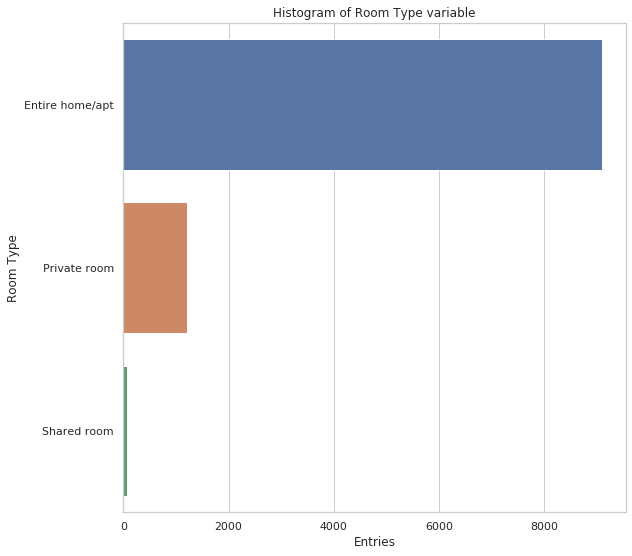

In [35]:
# groupBy room_type
roomTypesCountSeries = trainCsv.groupby(['ROOM_TYPE'])['ID'].nunique()

# we need the max of these counts
mostCommonRoomType = roomTypesCountSeries[roomTypesCountSeries == roomTypesCountSeries.max()]

print('The most common room type is the \'' + str(mostCommonRoomType.index[0]) + '\'')

sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))
ax = sns.barplot(x=roomTypesCountSeries.values, y=roomTypesCountSeries.index)
ax.set(title='Histogram of Room Type variable', xlabel='Entries', ylabel='Room Type')
plt.show()

- ### *Price evaluation during 3 months*

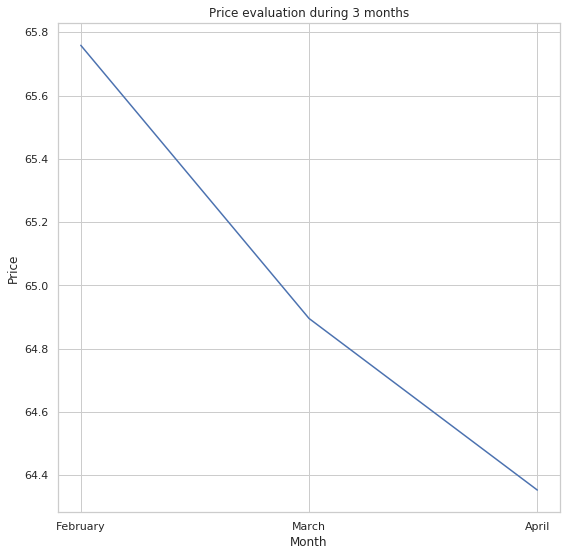

In [36]:
floatDf = trainCsv[['PRICE', 'MONTH']].copy()
floatDf['PRICE'] = floatDf['PRICE'].str.replace('$','')
floatDf['PRICE'] = floatDf['PRICE'].str.replace(',','')
floatDf['PRICE'] = floatDf['PRICE'].astype(float)

# replace Months with number so as we can sort them 
d = {'February':2, 'March':3, 'April':4}

floatDf.MONTH = floatDf.MONTH.map(d)

# groupBy month
pricesSeries = floatDf.groupby(['MONTH'])['PRICE'].mean()

pricesSeries = pricesSeries.sort_values(ascending=False)

# replace again the number with monthname 
dInverse = {2:'February', 3:'March', 4:'April'}

pricesSeries = pricesSeries.rename(dInverse)

sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))
plt.plot(pricesSeries.index, pricesSeries.values)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price evaluation during 3 months')
plt.show()

- ### *Find first 5 neighbourhoods with most reviews*

The first 5 neighbourhoods with most reviews are:
Plaka
Koukaki
Neos Kosmos
Psyri
Metaxourgeio


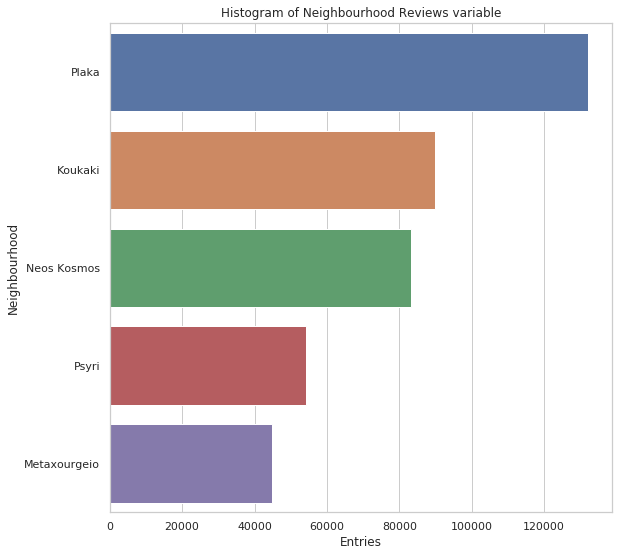

In [37]:
intDf = trainCsv[['NEIGHBOURHOOD', 'NUMBER_OF_REVIEWS']].copy()
intDf['NUMBER_OF_REVIEWS'] = intDf['NUMBER_OF_REVIEWS'].apply(int)

# groupBy neighbourhood
neighbourhoodReviewsSeries = intDf.groupby(['NEIGHBOURHOOD'])['NUMBER_OF_REVIEWS'].sum()

# sort values
neighbourhoodReviewsSeries = neighbourhoodReviewsSeries.sort_values(ascending=False)

print('The first 5 neighbourhoods with most reviews are:')
for x in neighbourhoodReviewsSeries[0:5].index:
    print(x)

neighbourhoodReviewsSeries = neighbourhoodReviewsSeries.head(5)
sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))
ax = sns.barplot(x=neighbourhoodReviewsSeries.values, y=neighbourhoodReviewsSeries.index)
ax.set(title='Histogram of Neighbourhood Reviews variable', xlabel='Entries', ylabel='Neighbourhood')
plt.show()

- ### *Find the neighbourhood with the most entries*

The neighbourhood with most entries is: Plaka


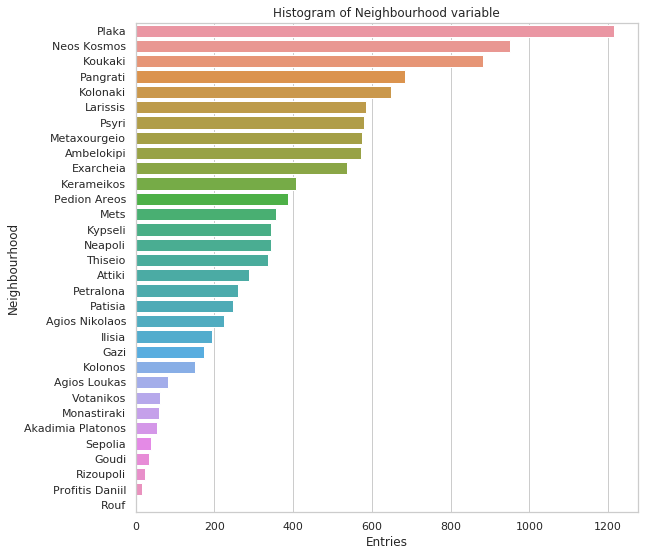

In [38]:
# groupBy neighbourhood
neighbourhoodEntriesSeries = trainCsv.groupby(['NEIGHBOURHOOD'])['ID'].nunique()

# sort values
neighbourhoodEntriesSeries = neighbourhoodEntriesSeries.sort_values(ascending=False)

print('The neighbourhood with most entries is:',neighbourhoodReviewsSeries.index[0])

sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))
ax = sns.barplot(x=neighbourhoodEntriesSeries.values, y=neighbourhoodEntriesSeries.index)
ax.set(title='Histogram of Neighbourhood variable', xlabel='Entries', ylabel='Neighbourhood')
plt.show()

- ### *Find number of entries per neighbourhood and per month*

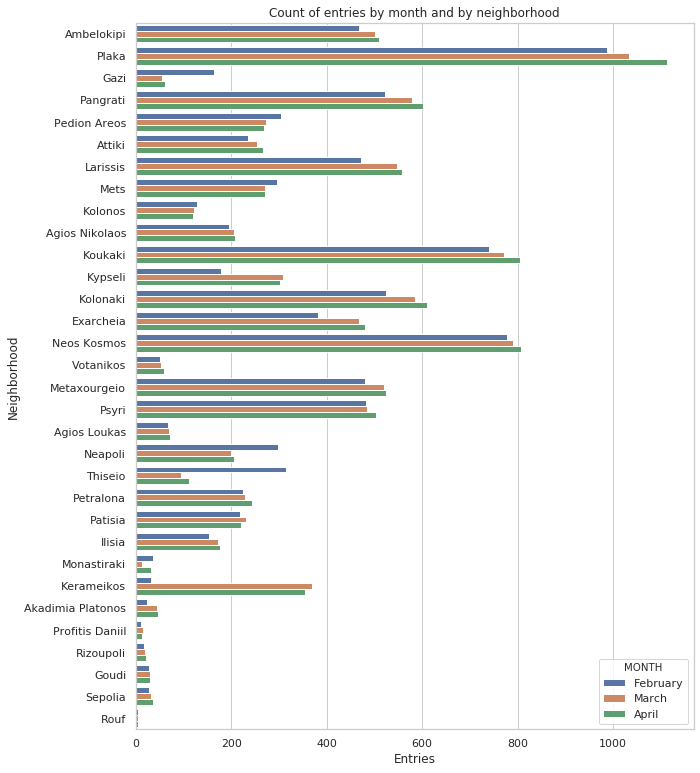

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 13))
ax = sns.countplot(y="NEIGHBOURHOOD", hue="MONTH", data=trainCsv)
ax.set(title='Count of entries by month and by neighborhood', xlabel='Entries', ylabel='Neighborhood')
plt.show()

- ### *Make histogram of neighbourhood variable*

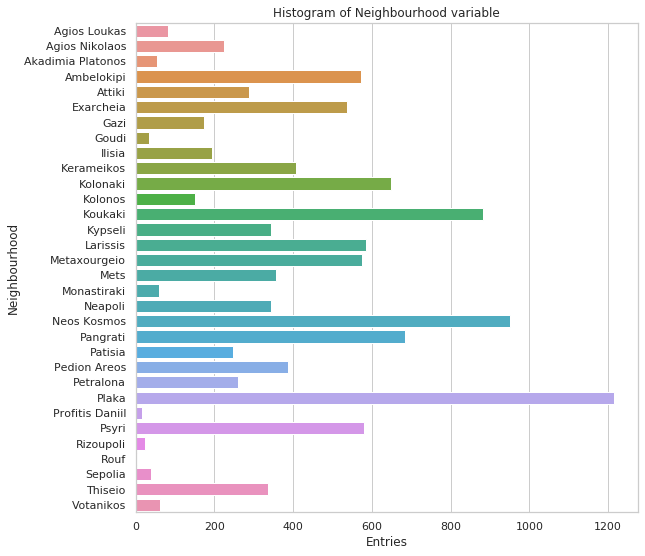

In [40]:
# groupBy neighbourhood
neighbourhoodEntriesSeries = trainCsv.groupby(['NEIGHBOURHOOD'])['ID'].nunique()

sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))
ax = sns.barplot(x=neighbourhoodEntriesSeries.values, y=neighbourhoodEntriesSeries.index)
ax.set(title='Histogram of Neighbourhood variable', xlabel='Entries', ylabel='Neighbourhood')
plt.show()

- ### *Find the most common room type in every neighbourhood*

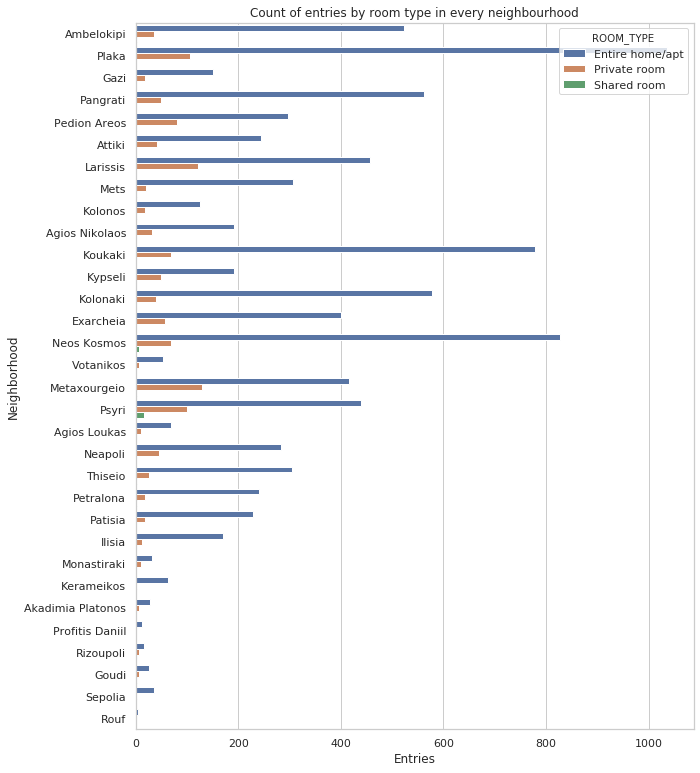

In [41]:

copyTrainCsv = trainCsv[['NEIGHBOURHOOD', 'ROOM_TYPE', 'ID']].copy()
copyTrainCsv = copyTrainCsv[copyTrainCsv.duplicated(subset='ID', keep='first') == False]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 13))
ax = sns.countplot(y="NEIGHBOURHOOD", hue="ROOM_TYPE", data=copyTrainCsv)
ax.set(title='Count of entries by room type in every neighbourhood', xlabel='Entries', ylabel='Neighborhood')
plt.show()

- ### *Find the most expensive room type*

The most expensive room type is the 'Private room'


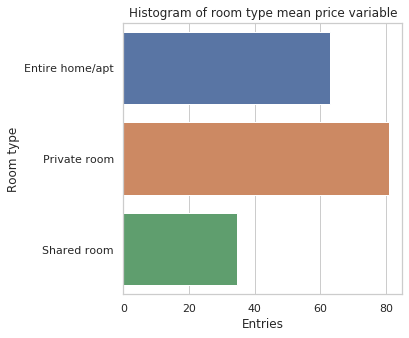

In [42]:

floatDf = trainCsv[['ROOM_TYPE', 'PRICE']].copy()
floatDf['PRICE'] = floatDf['PRICE'].str.replace('$','')
floatDf['PRICE'] = floatDf['PRICE'].str.replace(',','')
floatDf['PRICE'] = floatDf['PRICE'].astype(float)

# groupBy month
pricesSeries = floatDf.groupby(['ROOM_TYPE'])['PRICE'].mean()
mostExpensiveRoomType = pricesSeries[pricesSeries == pricesSeries.max()]
print('The most expensive room type is the \'' + str(mostExpensiveRoomType.index[0]) + '\'')

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=pricesSeries.values, y=pricesSeries.index)
ax.set(title='Histogram of room type mean price variable', xlabel='Entries', ylabel='Room type')
plt.show()

- ### *Show some entries in Follium Map*

In [43]:
# Let's select month February
subsetTrainCsv = trainCsv[trainCsv.MONTH == 'February']

# Gather locations
locations = subsetTrainCsv[['LATITUDE', 'LONGITUDE']]
locationlist = locations.values.tolist()

map = folium.Map(location=[37.97615090257737, 23.72510962013185], zoom_start=14)
tooltip = 'Click me!'

# for point in range(0, len(locationlist)):
for point in range(0, 500):
    stringForPopUp = subsetTrainCsv['PROPERTY_TYPE'][point] + '\n' + subsetTrainCsv['ROOM_TYPE'][point] \
        + '\n' + subsetTrainCsv['BED_TYPE'][point] + '\n' + subsetTrainCsv['PRICE'][point] \
        + '\n'
    folium.Marker(locationlist[point], popup=stringForPopUp, tooltip=tooltip).add_to(map)

map

- ### *Wordclouds*

  - #### Neigbourhood Wordcloud

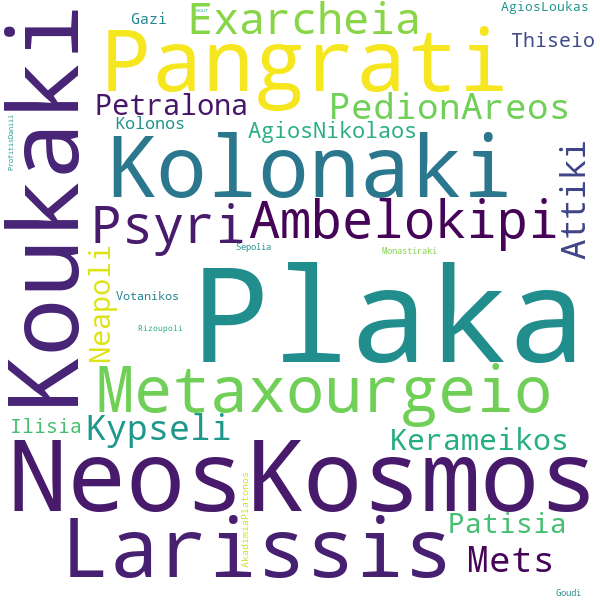

In [44]:
wholeNeihborhoodText = ''
for neihborhoodText in trainCsv['NEIGHBOURHOOD']:  
    # make words like "Agios Nikolaos" one word -> AgiosNikolaos
    neihborhoodText = neihborhoodText.replace(" ", "")
    
    wholeNeihborhoodText = wholeNeihborhoodText + ' ' + neihborhoodText

wc = WordCloud(width=600, height=600, background_color='white',collocations = False, stopwords=ENGLISH_STOP_WORDS)

wc.generate(wholeNeihborhoodText)
wc.to_file('neighbourhoodWordcloud.png')

Image('neighbourhoodWordcloud.png')

  - #### Transit Wordcloud

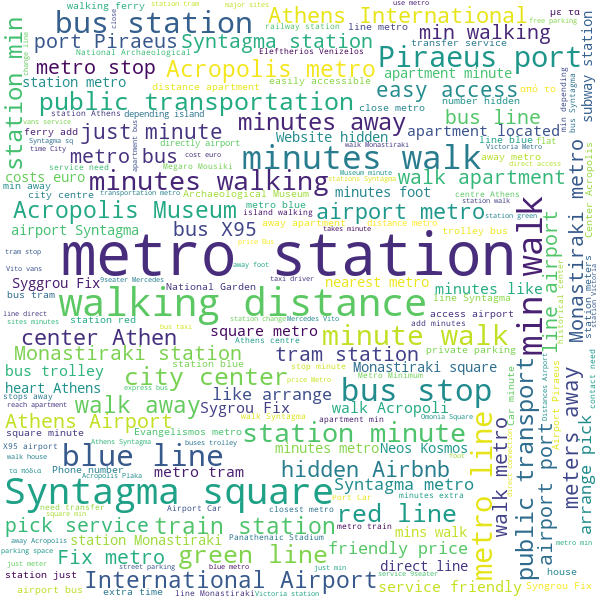

In [45]:
wholeTransitText = ''
for transitText in trainCsv['TRANSIT']:  
    wholeTransitText = wholeTransitText + ' ' + transitText

wc = WordCloud(width=600, height=600, background_color='white', stopwords=ENGLISH_STOP_WORDS)

wc.generate(wholeTransitText)
wc.to_file('transitWordcloud.png')

Image('transitWordcloud.png')

  - #### Description Wordcloud

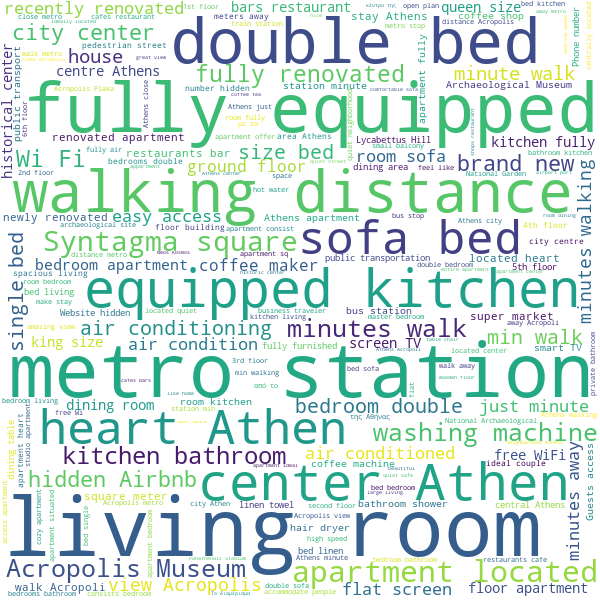

In [46]:
wholeDescriptionText = ''
for descriptionText in trainCsv['DESCRIPTION']:    
    wholeDescriptionText = wholeDescriptionText + ' ' + descriptionText

wc = WordCloud(width=600, height=600, background_color='white', stopwords=ENGLISH_STOP_WORDS)

wc.generate(wholeDescriptionText)
wc.to_file('descriptionWordcloud.png')

Image('descriptionWordcloud.png')

  - #### Last review Wordcloud

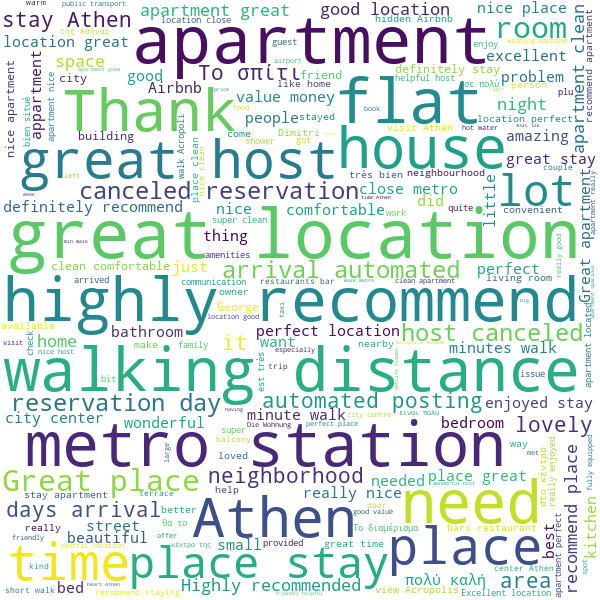

In [47]:
wholeReviewText = ''
for reviewText in trainCsv['LAST_REVIEW']:
    wholeReviewText = wholeReviewText + ' ' + reviewText

wc = WordCloud(width=600, height=600, background_color='white', stopwords=ENGLISH_STOP_WORDS)

wc.generate(wholeReviewText)
wc.to_file('lastReviewWordcloud.png')

Image('lastReviewWordcloud.png')

- ### *2 Extra Custom Questions*

  - #### How many of the hosts have verified their identity

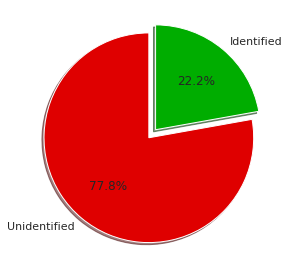

In [48]:
identityIdentifiedPercentageSeries = trainCsv['HOST_IDENTITY_VERIFIED'].value_counts(normalize=True)

labels = []
sizes = []

for index, value in identityIdentifiedPercentageSeries.items():
    labels.append(index) 
    sizes.append(value)

labelDict = {
  "t": "Identified",
  "f": "Unidentified"
}

# Change the values of labels list
labels = [labelDict[x] for x in labels]

# Pie chart

# only "explode" the 2nd slice
explode = (0, 0.1)  

#add colors
colors = ['#DF0000','#00AD00']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
 
plt.tight_layout()

plt.show()

  - #### The mean of Amenities for each Room Type

ROOM_TYPE
Entire home/apt    25.604884
Private room       19.961189
Shared room        16.000000
Name: NUMBER_OF_AMENITIES, dtype: float64


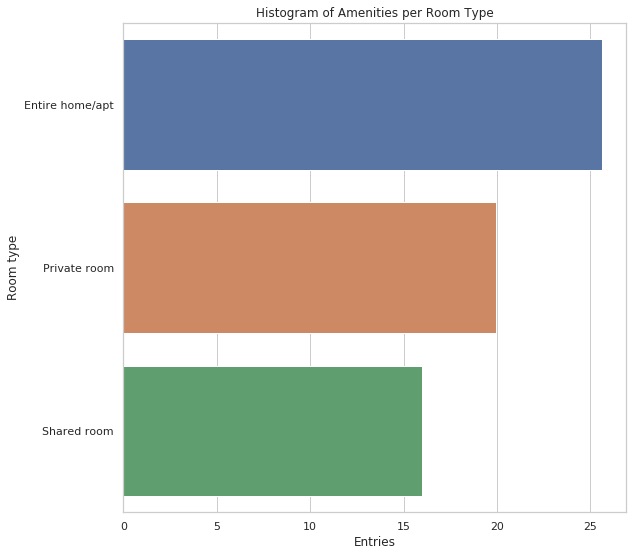

In [49]:
roomTypeAmenities = trainCsv[['ROOM_TYPE', 'ID', 'AMENITIES']].copy()

roomTypeAmenities['NUMBER_OF_AMENITIES'] = roomTypeAmenities.AMENITIES.str.count(',') + 1
roomTypeAmenities = roomTypeAmenities[roomTypeAmenities.duplicated(subset='ID', keep='first') == False]
numberOfAmenities = roomTypeAmenities.groupby(['ROOM_TYPE'])['NUMBER_OF_AMENITIES'].mean()

print(numberOfAmenities)

sns.set(style="whitegrid")
plt.figure(figsize=(9, 9))
ax = sns.barplot(x=numberOfAmenities.values, y=numberOfAmenities.index)
ax.set(title='Histogram of Amenities per Room Type', xlabel='Entries', ylabel='Room type')
plt.show()

## __Recommendation System__

We have already removed some stop words for the description wordcloud. Let's remove some punctuation and 
decrease the number of words to be shown in the wordcloud.

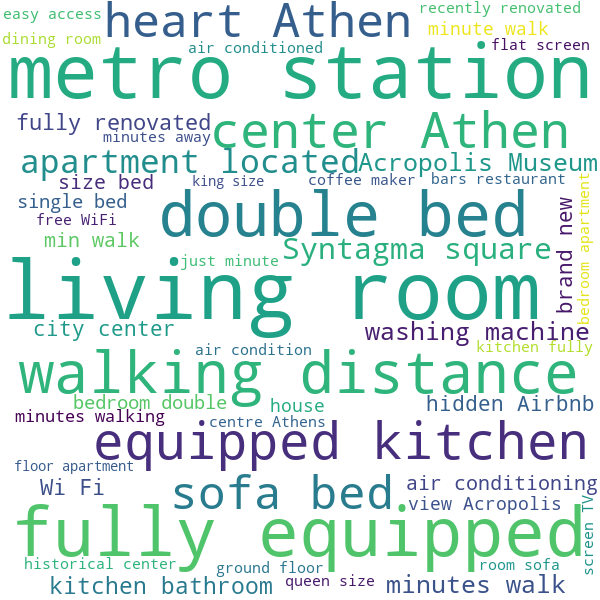

In [50]:
wholeDescriptionText = ''
for descriptionText in trainCsv['DESCRIPTION']:   

    # Remove any punctuation from the text
    for c in punctuation:
        descriptionText = descriptionText.replace(c, ' ')

    wholeDescriptionText = wholeDescriptionText + ' ' + descriptionText

wc = WordCloud(width=600, height=600, background_color='white', max_words=50, stopwords=ENGLISH_STOP_WORDS)

wc.generate(wholeDescriptionText)
wc.to_file('descriptionWordcloud2.png')

Image('descriptionWordcloud2.png')

We have already replaced nan values on name and description columns with "" (null string). So we are ready
to copy the columns ID, NAME and DESCRIPTION.

In [51]:
recommendCsv = trainCsv[['ID', 'NAME', 'DESCRIPTION']].copy()

# let's drop duplicate rows
recommendCsv.drop_duplicates(subset='ID', inplace=True)

# reset index of dataframe as we have dropped some rows
recommendCsv.reset_index(inplace=True, drop=True)

# make new column with the concatenation of name and description
recommendCsv['CONCATENATION'] = recommendCsv['NAME'] + recommendCsv['DESCRIPTION']

  - #### TF-IDF matrix of unigrams and bigrams for the CONCATENATION column

In [52]:
tfIdfVectorizer = TfidfVectorizer(
                                max_features=None,
                                stop_words=ENGLISH_STOP_WORDS,
                                ngram_range=(1, 2)        # as we want both unigrams and bigrams
                                )


biUniGramsMatrix = tfIdfVectorizer.fit_transform(recommendCsv['CONCATENATION'])

  - #### Cosine Similarity

In [53]:
calculatedCosine = cosine_similarity(biUniGramsMatrix)

The calculatedCosine is a 2d matrix which containsthe pairwise similarities between
all samples in recommendCsv['CONCATENATION'] . For example at position (0,1) we have
the cosine similarity score between id0 and id1. That means the similarity
of every sentence/document to itself is 1 (hence the diagonal of the matrix will be all ones).

In [54]:
print('Pairwise dense output:\n {}\n'.format(calculatedCosine))

Pairwise dense output:
 [[1.         0.49720999 0.53570265 ... 0.01344173 0.01002713 0.00390692]
 [0.49720999 1.         0.56864156 ... 0.03728755 0.00820558 0.00355341]
 [0.53570265 0.56864156 1.         ... 0.02025932 0.00907306 0.00392907]
 ...
 [0.01344173 0.03728755 0.02025932 ... 1.         0.00696978 0.00857936]
 [0.01002713 0.00820558 0.00907306 ... 0.00696978 1.         0.06856744]
 [0.00390692 0.00355341 0.00392907 ... 0.00857936 0.06856744 1.        ]]



Let's make a sparse matrix of cosine similarities.

In [55]:
calculatedCosineSparse = cosine_similarity(biUniGramsMatrix, dense_output=False)
print('Pairwise sparse output:\n {}\n'.format(calculatedCosineSparse))

Pairwise sparse output:
   (0, 9753)	0.0005808562909805279
  (0, 9702)	0.001576049319579209
  (0, 9674)	0.0010384226493408237
  (0, 9054)	0.0005152406644872497
  (0, 8950)	0.0011407926028639298
  (0, 8597)	0.0014822846423731668
  (0, 8334)	0.0010758145582588157
  (0, 7890)	0.0008743386248696665
  (0, 7543)	0.002040634317764353
  (0, 7525)	0.0005291632907333046
  (0, 7474)	0.0033933114018525725
  (0, 7423)	0.00048775567403257957
  (0, 6246)	0.0062236878963670885
  (0, 5872)	0.0005051307323380969
  (0, 5822)	0.0010754026938102777
  (0, 5696)	0.0005994878728977397
  (0, 5150)	0.0027208533604440666
  (0, 2560)	0.0024480252847102917
  (0, 2092)	0.001350491470586558
  (0, 568)	0.0006133857962394549
  (0, 259)	0.002379643806272067
  (0, 10222)	0.00023284626562444712
  (0, 10139)	0.001816643240814577
  (0, 10095)	0.0009319513261713831
  (0, 10045)	0.0007169219553719181
  :	:
  (10350, 976)	0.02159374278991044
  (10350, 746)	0.02085909099548769
  (10350, 736)	0.023550142575011982
  (10350, 710)

As we said the diagonal of the matrix will be all ones, so we will fill it with 0 so as to "skip" it
when we will search for largerst values. We will also fill with 0 the matrix below diagonal because
values are the same with those above diagonal. For example (10,2) and (2,10) have the same value.

In [56]:
calculatedCosineCopy =  np.triu(calculatedCosine, 1)

print('Pairwise dense output:\n {}\n'.format(calculatedCosineCopy))

Pairwise dense output:
 [[0.         0.49720999 0.53570265 ... 0.01344173 0.01002713 0.00390692]
 [0.         0.         0.56864156 ... 0.03728755 0.00820558 0.00355341]
 [0.         0.         0.         ... 0.02025932 0.00907306 0.00392907]
 ...
 [0.         0.         0.         ... 0.         0.00696978 0.00857936]
 [0.         0.         0.         ... 0.         0.         0.06856744]
 [0.         0.         0.         ... 0.         0.         0.        ]]



In [57]:
def largestIndices(array, n):
    """Returns the n largest indices from a numpy array."""
    # flatten the array
    flatArray = array.flatten()
    indices = np.argpartition(flatArray, -n)[-n:]
    indices = indices[np.argsort(-flatArray[indices])]
    return np.unravel_index(indices, array.shape)

In [58]:
mostSimilar100entries = largestIndices(calculatedCosineCopy, 100)

mostSimilar100entries

(array([ 7801,  8414,  3784,  8233,  7938,  7799,  7799,  7799,  7938,
         7315,  7799,  7799,  7799,  7955,  7955,  7938,  8173,  8233,
         7955,  7938,  8173,  8173,  7938,  9929,  7799,  8281,  7959,
         7955,  1143,  7959,  7959,  6940,  7800,  5795,  7955,  7938,
         7959,  9471,  4101,  9476,  1018,  8426,  9952,  9952,  5691,
         9471,  9482,  5013,  7835,  4227,  4227,  4229,  4154,  9482,
         4154,  9954,  8484,  9481,  8441,  7585,  8742,  4365,  4154,
         9481, 10030,  8441,  9481,  9484,  1985,  7290,  8499,  9416,
         4225,  9416,  7916,  4441,  8486,  4228,  8486,  9419,  7203,
         8515,  7312,  7714,  9446,  7704, 10080,  7704,  7704,  7704,
         7706, 10079, 10079,  3379,  7706,  7714,  7949,  7714,  7918,
        10078]),
 array([ 8242,  9308,  3879,  8281,  8233,  8281,  8233,  8173,  8173,
         9725,  7959,  7955,  7938,  8173,  8281,  7959,  8233,  8282,
         8282,  7955,  8282,  8281,  8281,  9953,  8282,  82

The above variable mostSimilar100entries is a tuple which consists of 2 arrays. The first array contains
the indices of the first entry in each pair and the second array contains the indices of the second entry
in each pair.

So let's construct the dictionary of the 100 most similar pairs.

In [59]:
mostSimilarDict = dict()
pairIndex = 1

for (firstEntry,secondEntry) in zip(*mostSimilar100entries):
    # keyString is of form pair_1, pair_2 etc
    keyString = "pair_" + str(pairIndex)
    # recommendCsv['ID'][firstEntry] is the ID for the first entry
    # recommendCsv['ID'][secondEntry] is the ID for the second entry
    # calculatedCosineCopy[firstEntry][secondEntry] is the cosine similarity score between these 2 entries
    mostSimilarDict[keyString] = (recommendCsv['ID'][firstEntry],
                                  recommendCsv['ID'][secondEntry],
                                  calculatedCosineCopy[firstEntry][secondEntry])
    pairIndex += 1 
    
mostSimilarDict

{'pair_1': ('30097307', '30917255', 1.0000000000000009),
 'pair_2': ('31368270', '32370704', 1.0000000000000007),
 'pair_3': ('21195111', '21402471', 1.0000000000000007),
 'pair_4': ('30906405', '30980429', 1.0000000000000004),
 'pair_5': ('30341020', '30906405', 1.0000000000000004),
 'pair_6': ('30089884', '30980429', 1.0000000000000004),
 'pair_7': ('30089884', '30906405', 1.0000000000000004),
 'pair_8': ('30089884', '30760835', 1.0000000000000004),
 'pair_9': ('30341020', '30760835', 1.0000000000000004),
 'pair_10': ('29174806', '18624578', 1.0000000000000004),
 'pair_11': ('30089884', '30363015', 1.0000000000000004),
 'pair_12': ('30089884', '30362269', 1.0000000000000004),
 'pair_13': ('30089884', '30341020', 1.0000000000000004),
 'pair_14': ('30362269', '30760835', 1.0000000000000004),
 'pair_15': ('30362269', '30980429', 1.0000000000000004),
 'pair_16': ('30341020', '30363015', 1.0000000000000004),
 'pair_17': ('30760835', '30906405', 1.0000000000000004),
 'pair_18': ('30906405'

Όπως παρατηρούμε πολλά ζευγάρια έχουν score 1.0 παρόλο που είναι διαφορετικά τα IDS (δηλαδή δεν πρόκειται για το ίδιο ακίνητο)
αλλά πρόκειται ίσως για συγκρότημα ακινήτων ή κάποιο hotel/hostel, οπότε ο ιδιοκτήτης έχει βάλλει το ίδιο όνομα και περιγραφή. 
Επομένως είναι λογικό αυτό που παρατηρούμε.

  - #### Recommend Function

In [60]:
def recommend(itemId, num):
    """Returns the n most similar entries with item_id entry"""

    stringToReturn = "Recommending " +  str(num)  + " listings similar to this entry \n" + \
                     "-------------------------------------------\n"
    
    # we need to find the index of this specific itemId
    indexInDf = recommendCsv.index[recommendCsv['ID'] == str(itemId)][0]

    # go to calculatedCosine matrix as we have already calculated all scores for each entry
    # and take the 1d array with similarity scores of this entry with all other entries
    thisEntryScores = np.copy(calculatedCosine[indexInDf])

    # replace thisEntryScores[indexInDf] with 0 , as it will be always 1, as it is the cosine similarity with itself
    thisEntryScores[indexInDf] = 0

    # call our function to find the indices of largest values
    mostSimilarEntries = largestIndices(thisEntryScores, num)

    # mostSimilarEntries is a tuple with 1 array, that contains the indices of the entries that are the most similar to this entry
    for indexPair in zip(*mostSimilarEntries):
        # indexPair is of form of (indexEntry,), so let's take only the indexEntry
        indexEntry = indexPair[0]

        #stringToReturn += "Recommended: ID " + str(recommendCsv['ID'][indexEntry]) + "\n"
        stringToReturn += "Recommended: " + str(recommendCsv['NAME'][indexEntry]) + "\n" + \
                          "Description: " + str(recommendCsv['DESCRIPTION'][indexEntry]) + "\n" + \
                          "(score:" + str(thisEntryScores[indexEntry]) + ")" + "\n\n"

    return stringToReturn

Let's run an example

In [61]:
print(recommend(29173432,5))

Recommending 5 listings similar to this entry 
-------------------------------------------
Recommended: Stylish flat for 4 ppl next to Athens Trilogy
Description: The apartment is fully equipped and recently decorated in order to fulfill the everyday needs of every traveler and tourist. The apartment is located a few meters away from the Panepistimio metro station.  What You Get:  -1 large bedroom -One Queen size bed. -Closets with extra linens, towels, pillows,  -Big living room, with great couch who can sleep comfortably 2 people, great light all day, amazing open space, adorable night view.  - Flat-screen TV - Kitchen with coffee maker, fridge,  - Full bathroom - WiFi - Baby crib or High Chair available upon request - Special prices of the “Athens Walking Tours”.  - A custom mobile Application with lots of info about the apartment you’re staying at, getting around, recommendations, etc.  - 24/7 communication. We’re here for you before, during and after your stay! We like welcoming a

  - #### Most common collocations

Before finding the 10 most common collocations let's make a wordcloud of CONCATENATION column.
This wordcloud may show us some of the most common collocations.

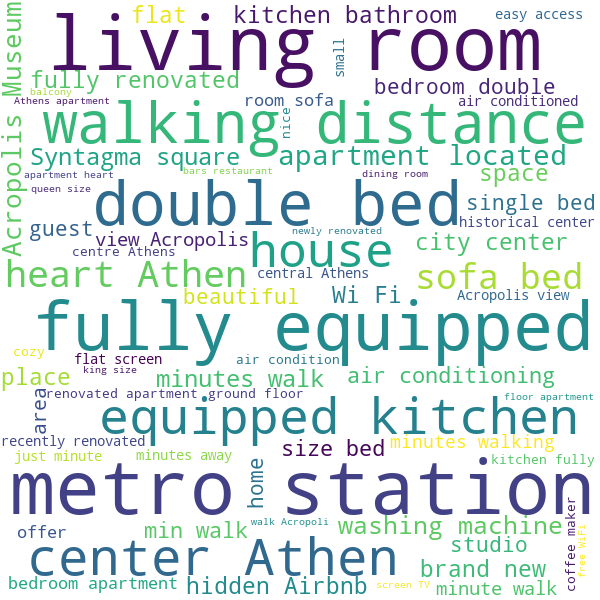

In [62]:
wholeConcatText = ''
for concatText in recommendCsv['CONCATENATION']:   
    wholeConcatText = wholeConcatText + ' ' + concatText

wc = WordCloud(width=600, height=600, background_color='white', max_words=70, stopwords=ENGLISH_STOP_WORDS)

wc.generate(wholeConcatText)
wc.to_file('concatWordcloud.png')

Image('concatWordcloud.png')

Let's use BigramCollocationFinder

In [63]:
wholeConcatTextForCollocations = []
for concatTextCollocations in recommendCsv['CONCATENATION']:   

    # Remove any punctuation from the text
    for c in punctuation:
        concatTextCollocations = concatTextCollocations.replace(c, ' ')

    # make all letter lower
    concatTextCollocations = concatTextCollocations.lower()

    # Remove consecutive spaces
    concatTextCollocations = re.sub(r" {2,}", ' ', concatTextCollocations)    
    
    # Split to words as BigramCollocationFinder needs tokens
    tokens = word_tokenize(concatTextCollocations)
    # Remove sropwords
    filtered = [w for w in tokens if w not in ENGLISH_STOP_WORDS]

    wholeConcatTextForCollocations += filtered

scorer = BigramAssocMeasures.likelihood_ratio

finder = BigramCollocationFinder.from_words(wholeConcatTextForCollocations)

finder.nbest(scorer, 10)

[('living', 'room'),
 ('fully', 'equipped'),
 ('metro', 'station'),
 ('walking', 'distance'),
 ('double', 'bed'),
 ('wi', 'fi'),
 ('washing', 'machine'),
 ('equipped', 'kitchen'),
 ('hidden', 'airbnb'),
 ('air', 'conditioning')]

Παρατηρούμε ότι στο τελευταίο wordcloud που φτιάξαμε εμφανίζονται και τα 10 πιο
συχνά collocations που βρήκαμε (που αυτό ήταν το επιθυμητό).